<a href="https://colab.research.google.com/github/douglassesi/MachineLearning/blob/main/Classifica%C3%A7%C3%A3o/Zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import das bibliotecas

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

#Carregando o arquivo Zoo

In [2]:
!git clone https://github.com/douglassesi/MachineLearning

Cloning into 'MachineLearning'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 156 (delta 54), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (156/156), 491.15 KiB | 4.23 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [3]:
os.chdir("/content/MachineLearning/Classificação/src")

In [4]:
filename = 'zoo.csv'

df_zoo=  pd.read_csv(filename,engine="python", sep=",")
df_zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


##Pré-análise

In [5]:
np.unique(df_zoo.class_type)

array([1, 2, 3, 4, 5, 6, 7])

In [6]:
df_zoo.isnull().sum()


animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

#Pré-processamento

###Reordenando as colunas para facilitar a manipulação

In [7]:
df_zoo = df_zoo[['class_type','animal_name','legs','hair','feathers',
                   'eggs','milk','airborne','aquatic','predator',
                   'toothed',	'backbone','breathes','venomous','fins','tail','domestic','catsize']]

##Separação das features

###Features

In [8]:
X = df_zoo.iloc[:,2:].values
X

array([[4, 1, 0, ..., 0, 0, 1],
       [4, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [4, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 1, ..., 1, 0, 0]])

###Target

Objetivo: Identificar a classe do animal

In [9]:
y = df_zoo.iloc[:,0].values
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

##Normalização

In [10]:
X = StandardScaler().fit_transform(X)

#Processamento

##Separação da massa de teste e treino

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=30)

##Aplicação do modelo de KNN

###Identificação do valor de K

[0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9032258064516129, 0.8064516129032258, 0.8064516129032258, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8064516129032258, 0.8064516129032258, 0.8064516129032258, 0.8064516129032258]


Text(0, 0.5, 'Testing Accuracy')

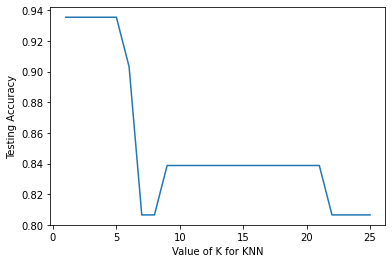

In [12]:
k_range=range(1,26)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
#Plota os valores de acc. em função do valor escolhido de K
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

###Aplicação para k = 4

In [13]:
Classif_KNN = KNeighborsClassifier(n_neighbors=4)

In [14]:
Classif_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [15]:
y_pred = Classif_KNN.predict(X_test)

###Análise do Resultado pela Matriz de Confusão

In [16]:
cm = confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.89      1.00      0.94         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.94        31
   macro avg       0.70      0.71      0.71        31
weighted avg       0.91      0.94      0.92        31

0.9354838709677419


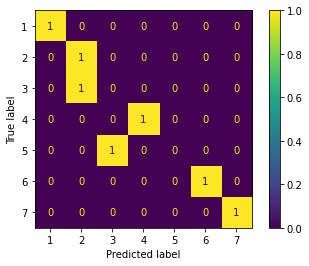

In [17]:
plot_confusion_matrix(Classif_KNN, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

##Resultado
Para k=4 temos uma acurácia de 87%